<img width="10%" alt="Naas" src="https://landen.imgix.net/jtci2pxwjczr/assets/5ice39g4.png?w=160"/>

# Google Analytics - Get unique visitors by day
<a href="https://app.naas.ai/user-redirect/naas/downloader?url=https://raw.githubusercontent.com/jupyter-naas/awesome-notebooks/master/Google%20Analytics/GoogleAnalytics_Get_stats_per_country.ipynb" target="_parent"><img src="https://naasai-public.s3.eu-west-3.amazonaws.com/open_in_naas.svg"/></a>

**Tags:** #googleanalytics #statspercountry #analytics

**Author:** [Florent Ravenel](https://www.linkedin.com/in/ACoAABCNSioBW3YZHc2lBHVG0E_TXYWitQkmwog/)

## Input

### Import library

In [1]:
import plotly.graph_objects as go
import plotly.express as px
import naas
# Using a dropin driver in a cell for now. (Faster iterations)
# from naas_drivers import googleanalytics

In [2]:
%run Google_Analytics_driver.ipynb

### Setup your Google Analytics

👉 Create your own <a href="">Google API JSON credential</a>

In [3]:
# Get your credential from Google Cloud Platform
json_path = 'naas-googleanalytics.json'

# Get view id from google analytics
view_id = "228952707"

# Setup your data parameters
metrics = "ga:newUsers"
dimensions = "ga:date"
start_date = "30daysAgo"
end_date = "today"

### Variables

In [29]:
# Chart title
title = "New visitors"

# Outputs path
name_output = "Googleanalytics_newusers_daily"
csv_output = f"{name_output}.csv"
html_output = f"{name_output}.html"

## Model

### Get trend for unique visitor by day

In [30]:
def get_trend(metrics,
              dimensions,
              start_date,
              end_date):
    
    # Get data
    df = googleanalytics.connect(json_path=json_path).views.get_data(
        view_id,
        metrics=metrics,
        dimensions=dimensions,
        start_date=start_date,
        end_date=end_date,
        format_type="summary",
        pivots_dimensions="ga:country",
    )
    
    # Format trend dataset
    df["date"] = df.index
    df = df.reset_index(drop=True)
    df["date"] = pd.to_datetime(df.apply(lambda row: row.date[0], axis=1))
    df["KPI"] = metrics.replace("ga:", "")
    df["VALUE"] = df[metrics]
    df = df.drop(metrics, axis=1)
    df.columns = df.columns.str.upper()
    
    # Calc variation
    for idx, row in df.iterrows():
        if idx == 0:
            value_n1 = 0
        else:
            value_n1 = df.loc[df.index[idx-1], "VALUE"]
        df.loc[df.index[idx], "VALUE_COMP"] = value_n1
    df["VARV"] = df["VALUE"] - df["VALUE_COMP"]
    df["VARP"] = df["VARV"] / abs(df["VALUE_COMP"])
    return df

df = get_trend(metrics,
               dimensions,
               start_date,
               end_date)
df

,DATE,KPI,VALUE,VALUE_COMP,VARV,VARP
0,2022-02-06,newUsers,75.0,0.0,75.0,inf
1,2022-02-07,newUsers,47.0,75.0,-28.0,-0.373333
2,2022-02-08,newUsers,30.0,47.0,-17.0,-0.361702
3,2022-02-09,newUsers,160.0,30.0,130.0,4.333333
4,2022-02-10,newUsers,525.0,160.0,365.0,2.281250
5,2022-02-11,newUsers,158.0,525.0,-367.0,-0.699048
6,2022-02-12,newUsers,84.0,158.0,-74.0,-0.468354
7,2022-02-13,newUsers,76.0,84.0,-8.0,-0.095238
8,2022-02-14,newUsers,85.0,76.0,9.0,0.118421
9,2022-02-15,newUsers,99.0,85.0,14.0,0.164706


### Plotting linechart

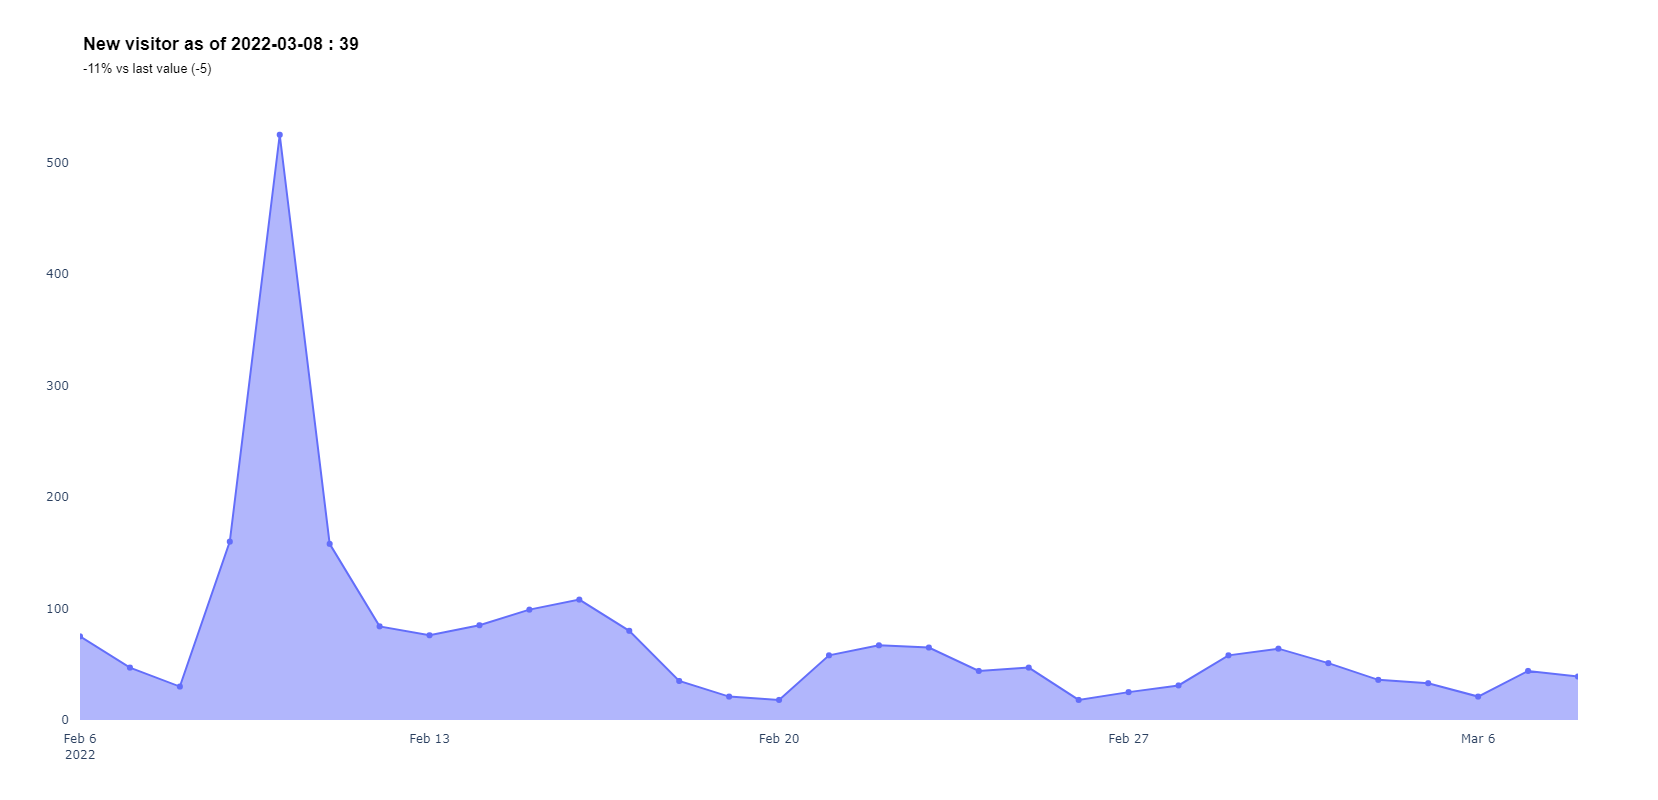

In [41]:
def create_linechart(df: pd.DataFrame, label, value, varv, varp, title):
    """
    Plot linechart as an area chart in Plotly.
    """
    # Prep data
    df["VALUE_D"] = df[value].map("{:,.0f}".format).str.replace(",", " ")
    df["VARV_D"] = df[varv].map("{:,.0f}".format).str.replace(",", " ")
    df.loc[df[varv] > 0, "VARV_D"] = "+" + df["VARV_D"]
    df["VARP_D"] = df[varp].map("{:,.0%}".format).str.replace(",", " ")
    df.loc[df[varp] > 0, "VARP_D"] = "+" + df["VARP_D"]    

    # Create hovertext
    df["TEXT"] = (f"<b>{title} as of " + df[label].astype(str) + " : " + df["VALUE_D"] + "</b><br><span style='font-size: 13px;'>" + df["VARP_D"] + " vs last value (" + df["VARV_D"] + ")</span>")
    
    # Get subtitle
    title_display = df.loc[df.index[-1], "TEXT"] 
    
    # Create data
    data = go.Scatter(
        x=df[label],
        y=df[value],
        stackgroup="one",
        text=df["TEXT"],
        hoverinfo="text",
    )
    
    # Create layout
    layout = go.Layout(
        title=title_display,
        title_font=dict(family="Arial", size=18, color="black"),
        plot_bgcolor="#ffffff",
        width=1200,
        height=800,
        margin_pad=10,
    )
    fig = go.Figure(data=data, layout=layout)
    fig.update_traces(mode='lines+markers')
    return fig

fig = create_linechart(df, "DATE", "VALUE", "VARV", "VARP", title)
fig

## Output

### Export and share graph

In [ ]:
# Export in HTML
fig.write_html(html_output)

# Shave with naas
#-> Uncomment the line below (by removing the hashtag) to share your asset with naas
# naas.asset.add(html_output, params={"inline": True})

#-> Uncomment the line below (by removing the hashtag)  to delete your asset
# naas.asset.delete(html_output)